# Generalized Nyquist stability criterion

Modified from example 2.7 from 

[1] Maciejowski, 1989. Multivariable Feedback Design

Determining stability of 
$$
G(s) = \frac{1}{1.25(s+1)(s+2)}
\begin{bmatrix}
s-1 & s \\
-6 & s-2
\end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nyquist contour will depend on the given transfer function.
Usually, for transfer matrices with no poles on the imaginary axis, 
the Nyquist contour is 

Text(0, 0.5, 'Imag')

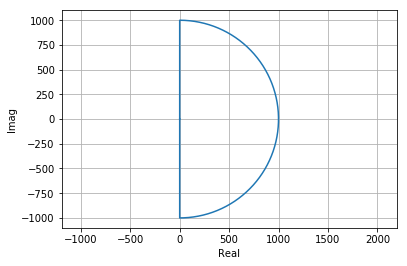

In [2]:
r = 1e3
s = np.arange(0,r)*1j # up along the imaginary axis from 0 -> \infty
th = np.arange(-np.pi/2, np.pi/2,0.01)[::-1]
s = np.hstack([s, r*(np.cos(th) + np.sin(th)*1j)]) # semicircular arc
s = np.hstack( [s, -np.arange(0,r)[::-1]*1j])  # up along the imaginary axis from -\infty -> 0
plt.figure()
plt.plot(s.real, s.imag)
plt.gca().axis('equal')
plt.xlabel('Real')
plt.ylabel('Imag')

For the above transfer function (and most processes modeling physical phenomenon) as $|s|\rightarrow \infty$,  $\text{det}(I+G(s))\rightarrow 1$.
To check the Generalized Nyquist stability criterion, we only need to look at what
happens along the imaginary axis.

In [3]:
s = np.logspace(-3,3,1000)*1j
eigs=[]
dets = []
I = np.eye(2)
for f in s:
    den = 1.25 * (f+1) * (f+2)
    G = np.array( [[f-1, f], [-6, f-2]] )
    G = G/den
    dets.append( np.linalg.det( I+G ))
    eigs.append( np.linalg.eigvals(I+G) )
eigs = np.asarray(eigs)
det = np.asarray(dets)

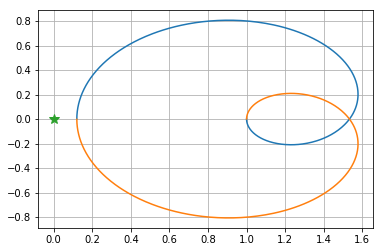

In [4]:
plt.figure();
plt.plot(np.real(dets), np.imag(dets));
plt.plot(np.real(dets), -np.imag(dets)); # transfer matrix is real valued
plt.plot(0,0,'*', ms=10)

As $G(s)$ has no open loop unstable poles $P_{ol} =0$, and the Nyquist plot does not encircle $0$, $G(s)$ is stable.

A variant of the Nyquist stability criterion looks at the eigen values of $I+G(s)$. 

**Thm 2.9** ( from [1]):

If $G(s)$ has $P_O$ unstable poles, then the closed-loop system with 
return ratio $-kG(s)$ is stable if and only if the characteristic
loci of $kG(s)$, taken together, encircle the point $-1P_O$ times
anticlockwise, assuming that there are no hidden unstable modes.

[1] defines characteristic loci as the graphs of the eigen values of $kG(s)$ as $s$
proceeds around the Nyquist contour.

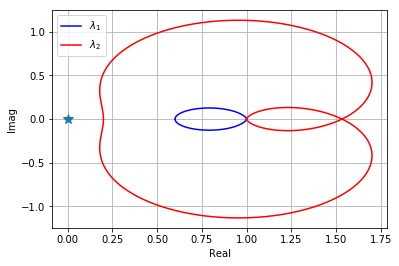

In [5]:
plt.figure();
plt.plot(np.real(eigs[:,0]), np.imag(eigs[:,0]),color="blue", label="$\lambda_1$")
plt.plot(np.real(eigs[:,0]), -np.imag(eigs[:,0]),color="blue")
plt.plot(np.real(eigs[:,1]), np.imag(eigs[:,1]), color="red", label="$\lambda_2$")
plt.plot(np.real(eigs[:,1]), -np.imag(eigs[:,1]), color="red")
plt.legend();
plt.xlabel('Real')
plt.ylabel('Imag');
plt.plot(0,0,'*', ms=10);